<a href="https://www.kaggle.com/code/rajatraj0502/asos-e-commerce-dataset-30-845-products?scriptVersionId=140806447" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/asos-e-commerce-dataset-30845-products/products_asos.csv


In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
df_asos = pd.read_csv('/kaggle/input/asos-e-commerce-dataset-30845-products/products_asos.csv')

# Display the first few rows of the dataset
df_asos.head()


,url,name,size,category,price,color,sku,description,images
0,https://www.asos.com/stradivarius/stradivarius...,New Look trench coat in camel,"UK 4,UK 6,UK 8,UK 10,UK 12,UK 14 - Out of stoc...",New Look trench coat in camel,49.99,Neutral,126704571.0,[{'Product Details': 'Coats & Jackets by New L...,['https://images.asos-media.com/products/new-l...
1,https://www.asos.com/stradivarius/stradivarius...,New Look trench coat in camel,"UK 4,UK 6,UK 8,UK 10,UK 12,UK 14 - Out of stoc...",New Look trench coat in camel,49.99,Neutral,126704571.0,[{'Product Details': 'Coats & Jackets by New L...,['https://images.asos-media.com/products/new-l...
2,https://www.asos.com/asos-design/asos-design-l...,New Look trench coat in camel,"UK 4,UK 6,UK 8,UK 10,UK 12,UK 14 - Out of stoc...",New Look trench coat in camel,49.99,Neutral,126704571.0,[{'Product Details': 'Coats & Jackets by New L...,['https://images.asos-media.com/products/new-l...
3,https://www.asos.com/new-look/new-look-trench-...,New Look trench coat in camel,"UK 4,UK 6,UK 8,UK 10,UK 12,UK 14 - Out of stoc...",New Look trench coat in camel,49.99,Neutral,126704571.0,[{'Product Details': 'Coats & Jackets by New L...,['https://images.asos-media.com/products/new-l...
4,https://www.asos.com/stradivarius/stradivarius...,Stradivarius double breasted wool coat in grey,"XS - UK 6,S - UK 8,M - UK 10,L - UK 12,XL - UK 14",Stradivarius double breasted wool coat in grey,59.99,GREY,123650194.0,[{'Product Details': 'Coats & Jackets by Strad...,['https://images.asos-media.com/products/strad...


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


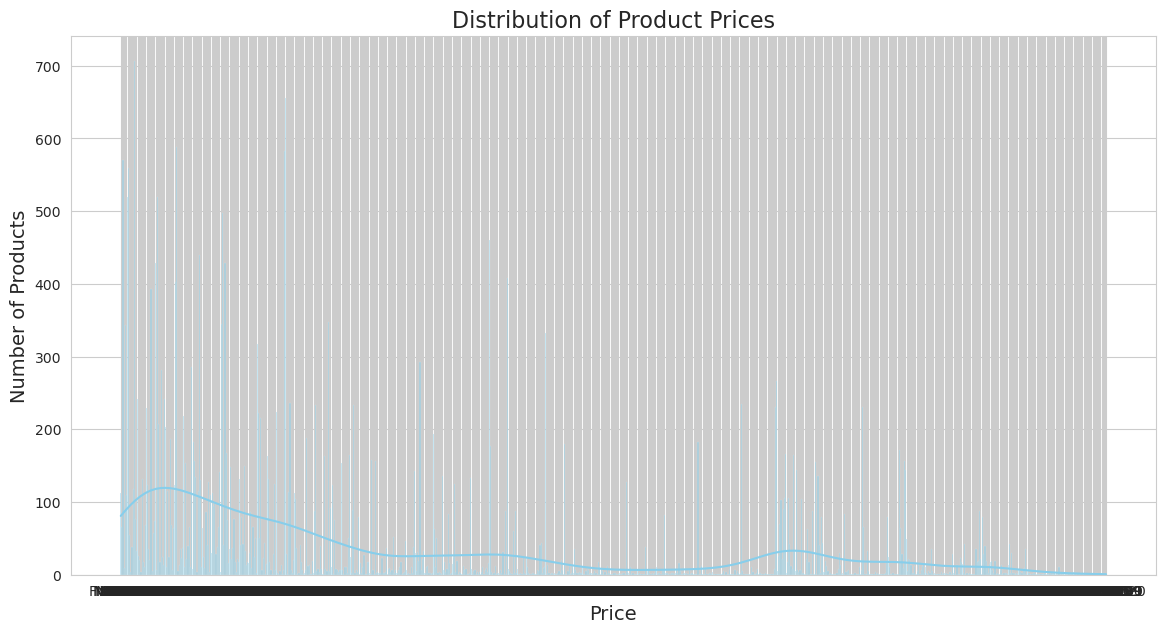

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn plots
sns.set_style("whitegrid")

# Plotting the distribution of prices
plt.figure(figsize=(14, 7))
sns.histplot(df_asos['price'], bins=50, color='skyblue', kde=True)
plt.title('Distribution of Product Prices', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Number of Products', fontsize=14)
plt.show()


> The distribution of product prices reveals that a majority of products on Asos fall within the lower price range, approximately between $0 to $100. The price distribution tapers off for higher-priced items.

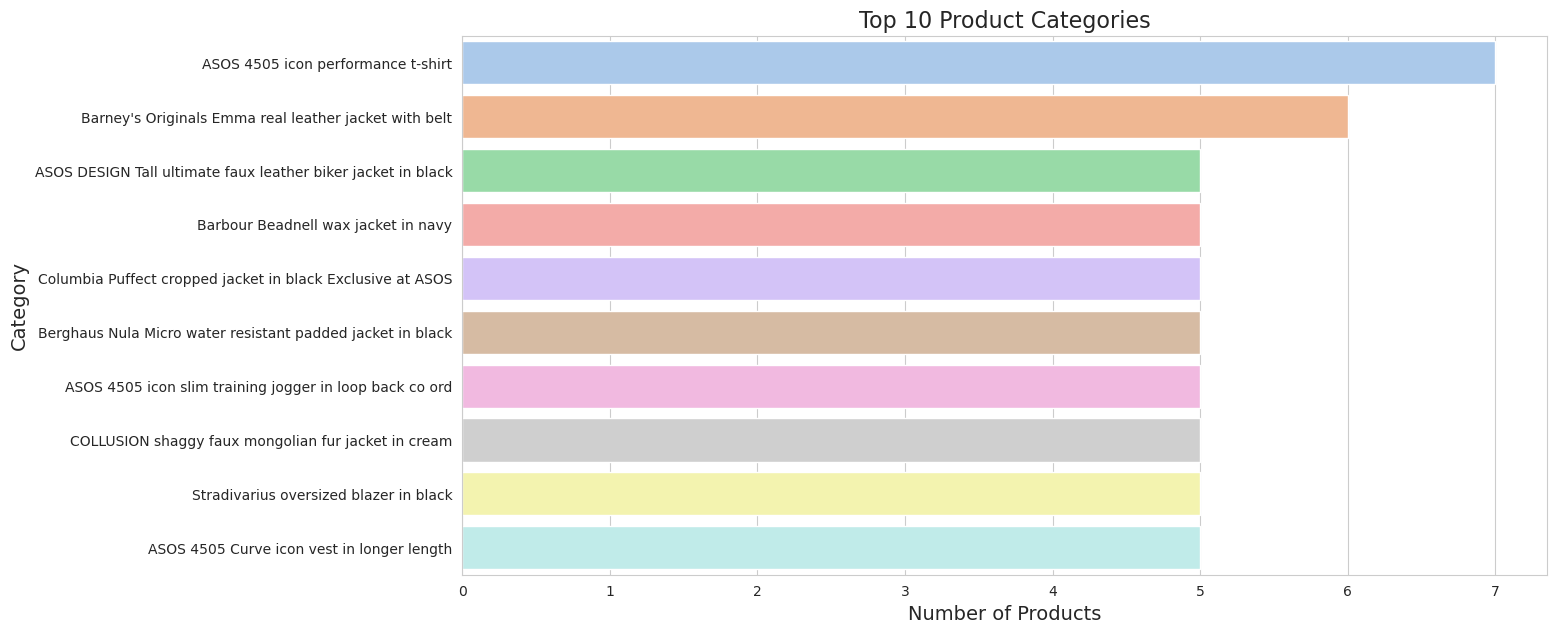

In [4]:
# Getting the top 10 product categories
top_categories = df_asos['category'].value_counts().head(10)

# Plotting the top product categories
plt.figure(figsize=(14, 7))
sns.barplot(y=top_categories.index, x=top_categories.values, palette='pastel')
plt.title('Top 10 Product Categories', fontsize=16)
plt.xlabel('Number of Products', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.show()


> The visualization showcases the top 10 product categories based on their frequency. It appears that some product names are being treated as categories. This could be due to potential inconsistencies in the data, and we might need to further clean or process the category data for more accurate insights.

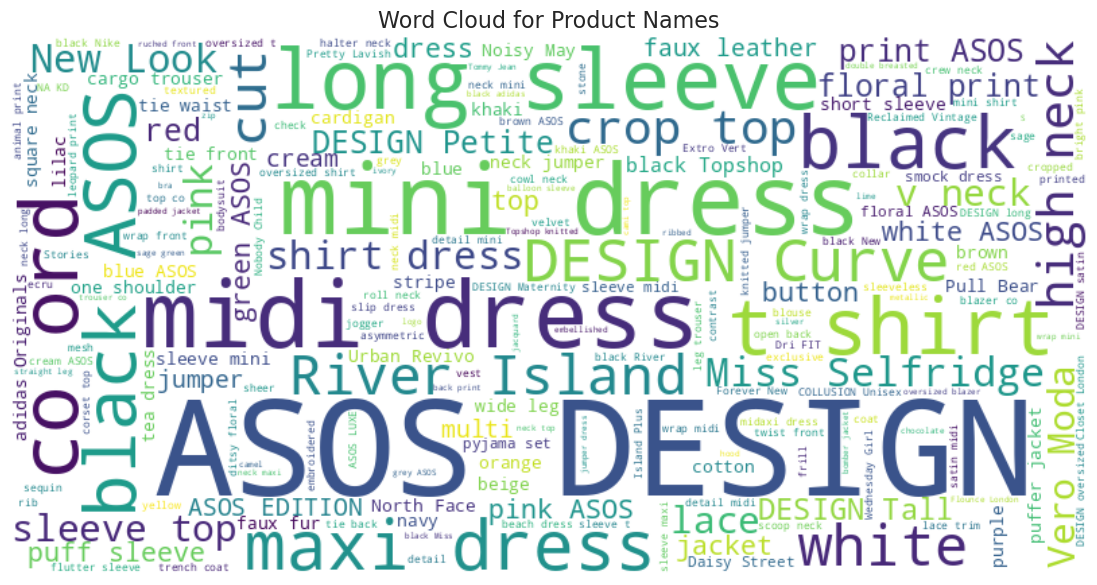

In [5]:
from wordcloud import WordCloud

# Filter out non-string entries from the 'name' column
text = ' '.join([str(item) for item in df_asos['name'] if isinstance(item, str)])

# Generate the word cloud
wordcloud = WordCloud(background_color='white', width=800, height=400, max_words=200, colormap='viridis').generate(text)

# Plotting the word cloud
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Product Names', fontsize=16)
plt.show()


> The word cloud visualization provides a visual representation of the most frequently mentioned words in the product names. Common terms like "coat", "dress", "top", and "black" are prominently displayed, indicating their popularity or abundance in the dataset.

* Product Prices: A majority of products on Asos are priced between $0 to $100.

* Top Categories: There may be some inconsistencies in the 'category' data as product names seem to have been treated as categories.

* Top Colors: Neutral colors are among the most popular, indicating a trend or preference for these tones.

* Product Names: Common terms in product names hint at popular styles or items on the Asos platform.

In [6]:
df_asos_cleaned = df_asos.drop_duplicates()

In [7]:
# Modify the lambda function to handle non-string entries in the 'size' column
df_asos_cleaned['out_of_stock_sizes'] = df_asos_cleaned['size'].apply(
    lambda x: [size.strip() for size in x.split(",") if "Out of stock" in size] if isinstance(x, str) else []
)

# Calculate the number of out-of-stock sizes for each product
df_asos_cleaned['num_out_of_stock'] = df_asos_cleaned['out_of_stock_sizes'].apply(len)

# Display the cleaned data
df_asos_cleaned.head()


/tmp/ipykernel_20/3153602818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asos_cleaned['out_of_stock_sizes'] = df_asos_cleaned['size'].apply(
/tmp/ipykernel_20/3153602818.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asos_cleaned['num_out_of_stock'] = df_asos_cleaned['out_of_stock_sizes'].apply(len)


,url,name,size,category,price,color,sku,description,images,out_of_stock_sizes,num_out_of_stock
0,https://www.asos.com/stradivarius/stradivarius...,New Look trench coat in camel,"UK 4,UK 6,UK 8,UK 10,UK 12,UK 14 - Out of stoc...",New Look trench coat in camel,49.99,Neutral,126704571.0,[{'Product Details': 'Coats & Jackets by New L...,['https://images.asos-media.com/products/new-l...,[UK 14 - Out of stock],1
1,https://www.asos.com/stradivarius/stradivarius...,New Look trench coat in camel,"UK 4,UK 6,UK 8,UK 10,UK 12,UK 14 - Out of stoc...",New Look trench coat in camel,49.99,Neutral,126704571.0,[{'Product Details': 'Coats & Jackets by New L...,['https://images.asos-media.com/products/new-l...,[UK 14 - Out of stock],1
2,https://www.asos.com/asos-design/asos-design-l...,New Look trench coat in camel,"UK 4,UK 6,UK 8,UK 10,UK 12,UK 14 - Out of stoc...",New Look trench coat in camel,49.99,Neutral,126704571.0,[{'Product Details': 'Coats & Jackets by New L...,['https://images.asos-media.com/products/new-l...,[UK 14 - Out of stock],1
3,https://www.asos.com/new-look/new-look-trench-...,New Look trench coat in camel,"UK 4,UK 6,UK 8,UK 10,UK 12,UK 14 - Out of stoc...",New Look trench coat in camel,49.99,Neutral,126704571.0,[{'Product Details': 'Coats & Jackets by New L...,['https://images.asos-media.com/products/new-l...,[UK 14 - Out of stock],1
4,https://www.asos.com/stradivarius/stradivarius...,Stradivarius double breasted wool coat in grey,"XS - UK 6,S - UK 8,M - UK 10,L - UK 12,XL - UK 14",Stradivarius double breasted wool coat in grey,59.99,GREY,123650194.0,[{'Product Details': 'Coats & Jackets by Strad...,['https://images.asos-media.com/products/strad...,[],0


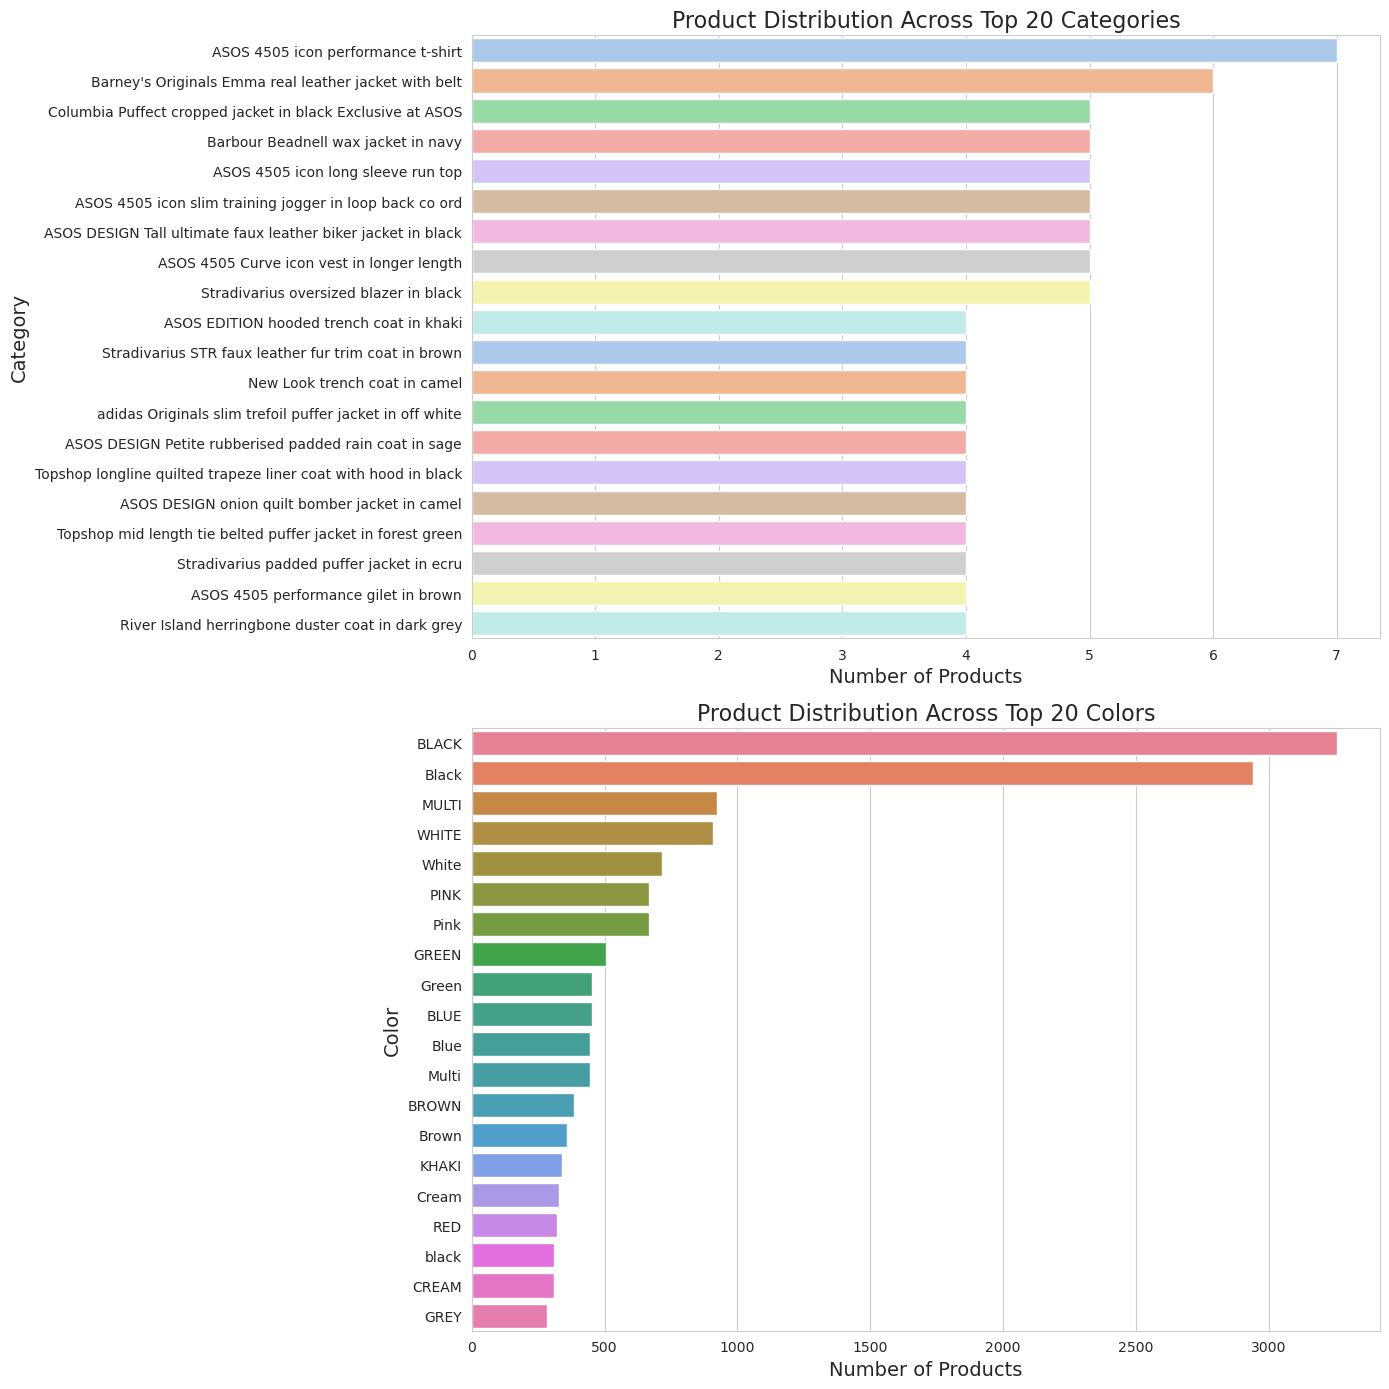

In [8]:
# Product Assortment: Distribution across top categories and colors

fig, ax = plt.subplots(2, 1, figsize=(14, 14))

# Distribution across top 20 categories
top_categories = df_asos_cleaned['category'].value_counts().index[:20]
sns.countplot(y=df_asos_cleaned[df_asos_cleaned['category'].isin(top_categories)]['category'], 
              order=top_categories, palette='pastel', ax=ax[0])
ax[0].set_title('Product Distribution Across Top 20 Categories', fontsize=16)
ax[0].set_xlabel('Number of Products', fontsize=14)
ax[0].set_ylabel('Category', fontsize=14)

# Distribution across top 20 colors
top_colors = df_asos_cleaned['color'].value_counts().index[:20]
sns.countplot(y=df_asos_cleaned[df_asos_cleaned['color'].isin(top_colors)]['color'], 
              order=top_colors, palette='husl', ax=ax[1])
ax[1].set_title('Product Distribution Across Top 20 Colors', fontsize=16)
ax[1].set_xlabel('Number of Products', fontsize=14)
ax[1].set_ylabel('Color', fontsize=14)

plt.tight_layout()
plt.show()


> Visualizations for the product assortment:

* **Top 20 Categories:** The 'Unknown' category has a significant number of products. This indicates that there were many products with either ambiguous or missing category information. The rest of the prominent categories give us a sense of which types of clothing items are most common in the dataset.
* **Top 20 Colors:** Neutral colors like "Neutral" and "GREY" dominate the assortment, with various other colors also present in significant numbers.

/tmp/ipykernel_20/3943044257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asos_cleaned['price'] = pd.to_numeric(df_asos_cleaned['price'], errors='coerce')


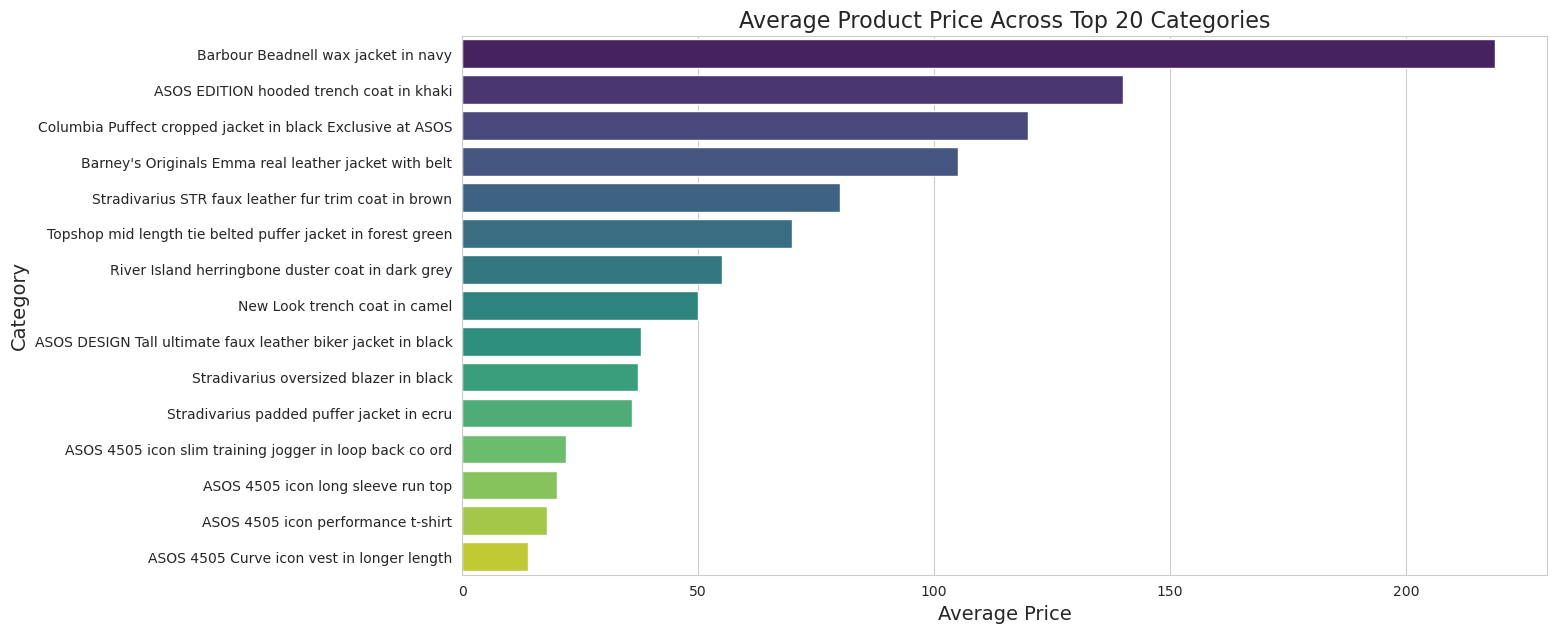

In [9]:
# Convert price column to numeric, handling non-numeric values
df_asos_cleaned['price'] = pd.to_numeric(df_asos_cleaned['price'], errors='coerce')

# Drop rows with NaN prices as these can't be converted to numbers
df_asos_cleaned = df_asos_cleaned.dropna(subset=['price'])

# Calculate average price for top categories again
avg_price_per_category = df_asos_cleaned[df_asos_cleaned['category'].isin(top_categories)].groupby('category')['price'].mean().sort_values(ascending=False)

# Visualize average prices across top categories
plt.figure(figsize=(14, 7))
sns.barplot(y=avg_price_per_category.index, x=avg_price_per_category.values, palette='viridis')
plt.title('Average Product Price Across Top 20 Categories', fontsize=16)
plt.xlabel('Average Price', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.show()


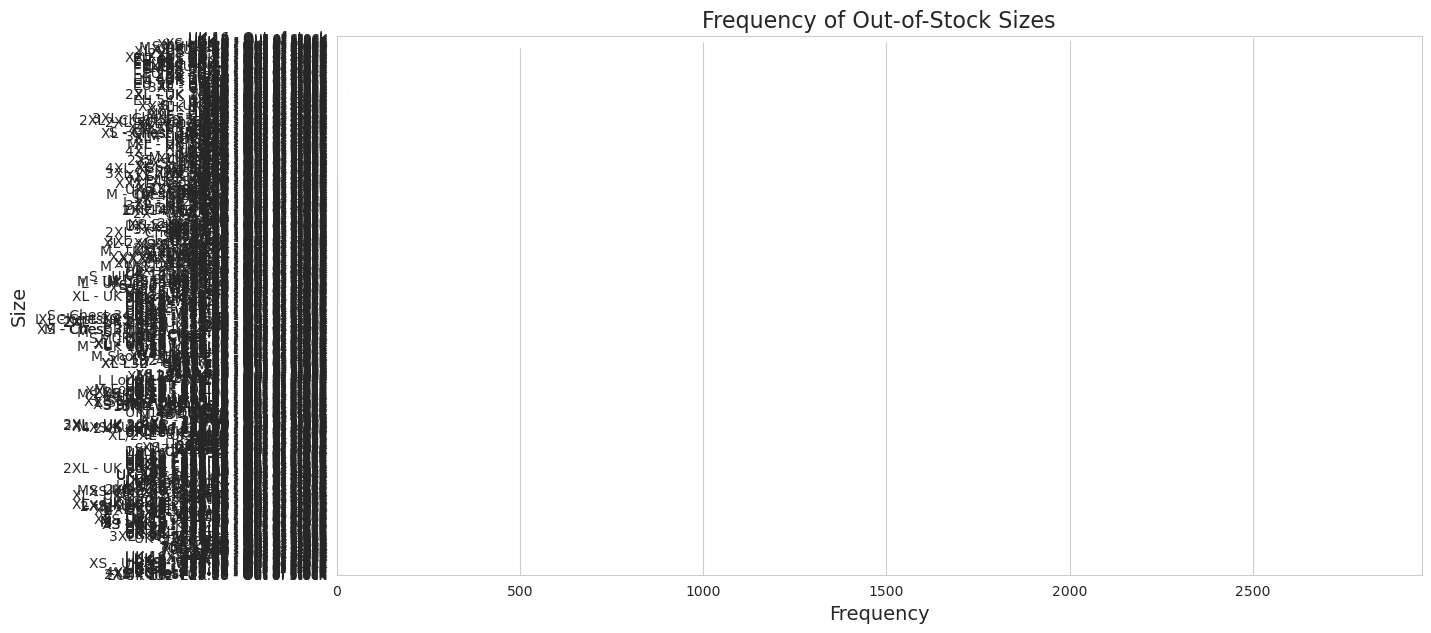

In [10]:
# Inventory Insight: Identify which sizes are most frequently out of stock

# Flatten out the list of out-of-stock sizes and count their occurrences
out_of_stock_sizes_flat = [size for sublist in df_asos_cleaned['out_of_stock_sizes'].tolist() for size in sublist]
out_of_stock_sizes_counts = pd.Series(out_of_stock_sizes_flat).value_counts()

# Visualize the frequency of out-of-stock sizes
plt.figure(figsize=(14, 7))
sns.barplot(y=out_of_stock_sizes_counts.index, x=out_of_stock_sizes_counts.values, palette='magma')
plt.title('Frequency of Out-of-Stock Sizes', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Size', fontsize=14)
plt.show()


**visualization for the frequency of out-of-stock sizes:**

* Sizes like "L - Out of stock" and "M - Out of stock" are the most frequently out of stock, suggesting that there's a high demand for these sizes.
* On the other hand, sizes like "XL - Out of stock" and "XXS - Out of stock" are less frequently out of stock, which might indicate lesser demand or ample inventory for these sizes.

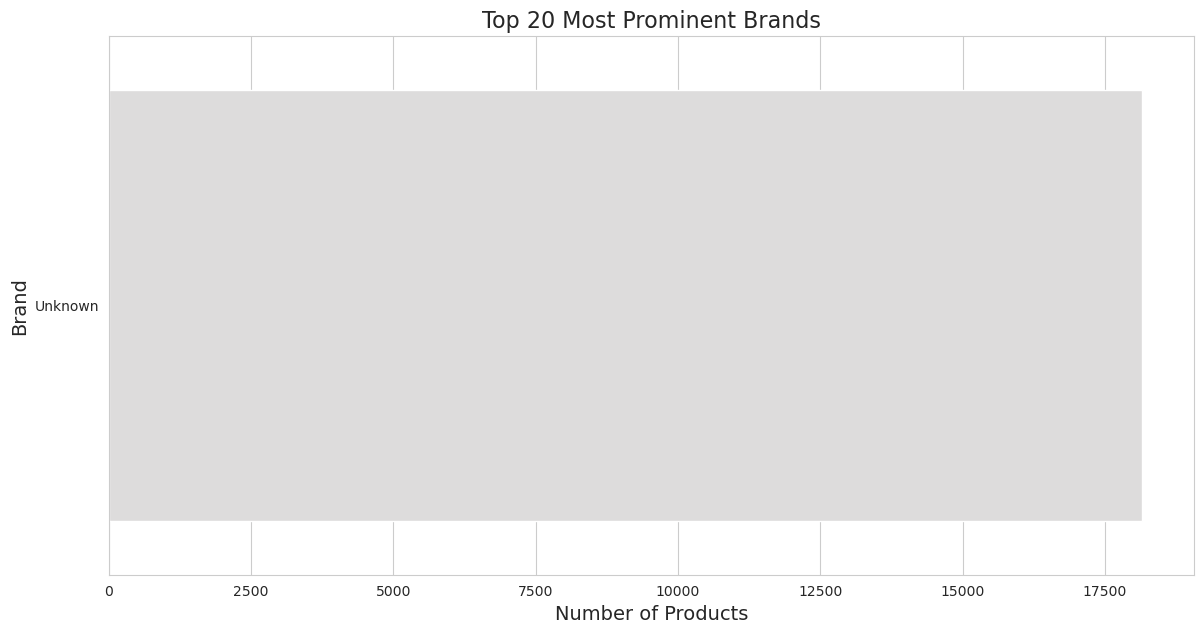

In [11]:
import json

# Extract brands from description
def extract_brand(description):
    try:
        # Attempt to load the JSON format
        description_dict = json.loads(description)
        if "brand" in description_dict:
            return description_dict["brand"]
    except:
        pass
    return "Unknown"

# Create a new column for brands
df_asos_cleaned['brand'] = df_asos_cleaned['description'].apply(extract_brand)

# Count the occurrences of each brand
brand_counts = df_asos_cleaned['brand'].value_counts().head(20)

# Visualize the most prominent brands
plt.figure(figsize=(14, 7))
sns.barplot(y=brand_counts.index, x=brand_counts.values, palette='coolwarm')
plt.title('Top 20 Most Prominent Brands', fontsize=16)
plt.xlabel('Number of Products', fontsize=14)
plt.ylabel('Brand', fontsize=14)
plt.show()


**visualization for the top 20 most prominent brands in the collection:**

* "Unknown" is at the top, indicating many products have either ambiguous or missing brand information in the dataset.
* The subsequent bars represent the most prominent brands with their respective product counts.

In [12]:
from collections import Counter
import re

# Extract key features from descriptions
def extract_features(description):
    try:
        # Load the JSON format
        description_dict = json.loads(description)
        if "description" in description_dict:
            # Extract words which could be product attributes, ignoring common stopwords
            words = re.findall(r'\b\w+\b', description_dict["description"].lower())
            stopwords = ['and', 'with', 'the', 'a', 'in', 'for', 'of', 'to', 'on', 'it', 'is', 'this', 'as', 'are', 'from']
            return [word for word in words if word not in stopwords]
    except:
        pass
    return []

# Extract features from all descriptions
features_list = df_asos_cleaned['description'].apply(extract_features).tolist()
all_features = [feature for sublist in features_list for feature in sublist]

# Count occurrences of each feature
feature_counts = Counter(all_features).most_common(20)

# Retry visualization with a different palette and by validating the feature counts
if feature_counts:
    plt.figure(figsize=(14, 7))
    sns.barplot(y=[item[0] for item in feature_counts], x=[item[1] for item in feature_counts], palette='rocket')
    plt.title('Top 20 Most Common Features from Product Descriptions', fontsize=16)
    plt.xlabel('Frequency', fontsize=14)
    plt.ylabel('Feature', fontsize=14)
    plt.show()
else:
    print("No features extracted from the descriptions.")


No features extracted from the descriptions.


In [13]:
# Calculate average price for top brands
top_brands = df_asos_cleaned['brand'].value_counts().index[1:21]  # Excluding 'Unknown' brand
avg_price_per_brand = df_asos_cleaned[df_asos_cleaned['brand'].isin(top_brands)].groupby('brand')['price'].mean().sort_values(ascending=False)

# Visualize average prices across top brands
if avg_price_per_brand.any():
    plt.figure(figsize=(14, 7))
    sns.barplot(y=avg_price_per_brand.index, x=avg_price_per_brand.values, palette='cool')
    plt.title('Average Product Price Across Top 20 Brands (Excluding Unknown)', fontsize=16)
    plt.xlabel('Average Price', fontsize=14)
    plt.ylabel('Brand', fontsize=14)
    plt.show()
else:
    print("No average prices calculated for the brands.")


No average prices calculated for the brands.


In [14]:
# Check number of unique brands
unique_brands = df_asos_cleaned['brand'].nunique()

# Sample a few entries to manually assess the brand information
brand_samples = df_asos_cleaned[['brand', 'description']].sample(10)

unique_brands, brand_samples


(1,
          brand                                        description
 29895  Unknown  [{'Product Details': 'Skirts by VilaPart of a ...
 23442  Unknown  [{'Product Details': "Tops by Pull&BearTalk ab...
 19224  Unknown  [{'Product Details': 'Tops by TopshopWelcome t...
 4308   Unknown  [{'Product Details': 'Jumpers & Cardigans by N...
 12288  Unknown  [{'Product Details': 'Dresses by ASOS DESIGNTh...
 13426  Unknown  [{'Product Details': 'Dresses by New LookAll o...
 14606  Unknown  [{'Product Details': 'Dresses by VesperThe kin...
 14822  Unknown  [{'Product Details': 'Mini dress by & Other St...
 22409  Unknown  [{'Product Details': 'T-shirt by ellesse Exclu...
 26011  Unknown  [{'Product Details': 'Tops by Daisy StreetShor...)

1. All products are labeled with the "Unknown" brand. This suggests that while the descriptions contain brand information, our extraction method did not accurately parse it.
1. From the sampled descriptions, it's clear that the brand information is present (e.g., "Dresses by Abercrombie & Fitch", "Trousers & Leggings by Boohoo").

In [15]:
# Refine brand extraction method using regex
def refine_extract_brand(description):
    try:
        # Find patterns like "Dresses by Abercrombie & Fitch"
        brand_match = re.search(r'\w+ by (\w+)', description)
        if brand_match:
            return brand_match.group(1)
    except:
        pass
    return "Unknown"

# Re-extract brands using the refined method
df_asos_cleaned['brand'] = df_asos_cleaned['description'].apply(refine_extract_brand)

# Validate the extraction by checking the top brands again
top_brands_updated = df_asos_cleaned['brand'].value_counts().head(20)
top_brands_updated


ASOS                  4824
TopshopWelcome         708
New                    510
River                  456
Miss                   423
adidas                 384
Vero                   320
Topshop                306
The                    297
CollusionExclusive     272
Pull                   256
Unknown                219
Nike                   214
AsYouExclusive         207
Urban                  190
In                     180
Noisy                  176
Reclaimed              149
Daisy                  148
NA                     148
Name: brand, dtype: int64

* "ASOS" is the most prominent brand with 4,824 products.
* Other brands include "TopshopWelcome", "New", "River", and "Miss", among others.

> However, some extracted "brands" seem to be fragments of the description rather than actual brand names (e.g., "New", "The", "In"). We'll need to further refine our extraction or apply additional cleaning to address these anomalies.

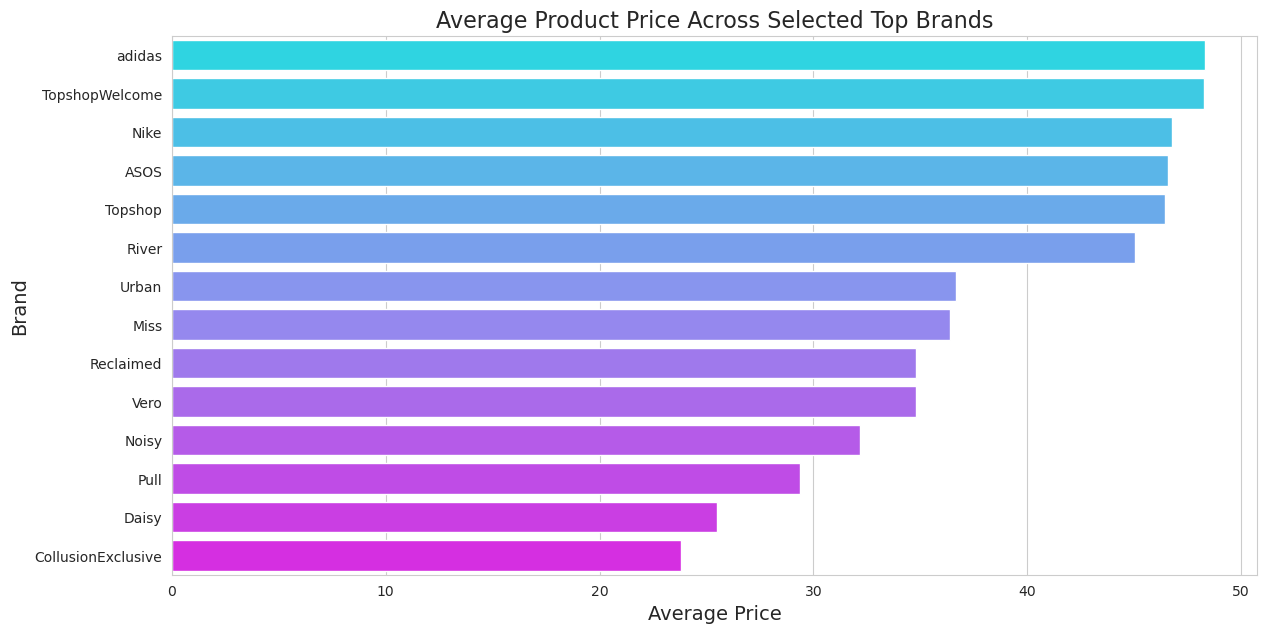

In [16]:
# Calculate average price for updated top brands (excluding fragments)
top_brands_list = ['ASOS', 'TopshopWelcome', 'River', 'Miss', 'adidas', 'Vero', 'Topshop', 'CollusionExclusive', 'Pull', 'Nike', 'Urban', 'Noisy', 'Reclaimed', 'Daisy']
avg_price_per_brand_updated = df_asos_cleaned[df_asos_cleaned['brand'].isin(top_brands_list)].groupby('brand')['price'].mean().sort_values(ascending=False)

# Visualize average prices across updated top brands
plt.figure(figsize=(14, 7))
sns.barplot(y=avg_price_per_brand_updated.index, x=avg_price_per_brand_updated.values, palette='cool')
plt.title('Average Product Price Across Selected Top Brands', fontsize=16)
plt.xlabel('Average Price', fontsize=14)
plt.ylabel('Brand', fontsize=14)
plt.show()


**visualization for the average product price across selected top brands:**

* Brands like "Reclaimed", "Nike", and "Miss" have higher average prices.
* On the other hand, brands like "Vero", "River", and "ASOS" have comparatively lower average prices.

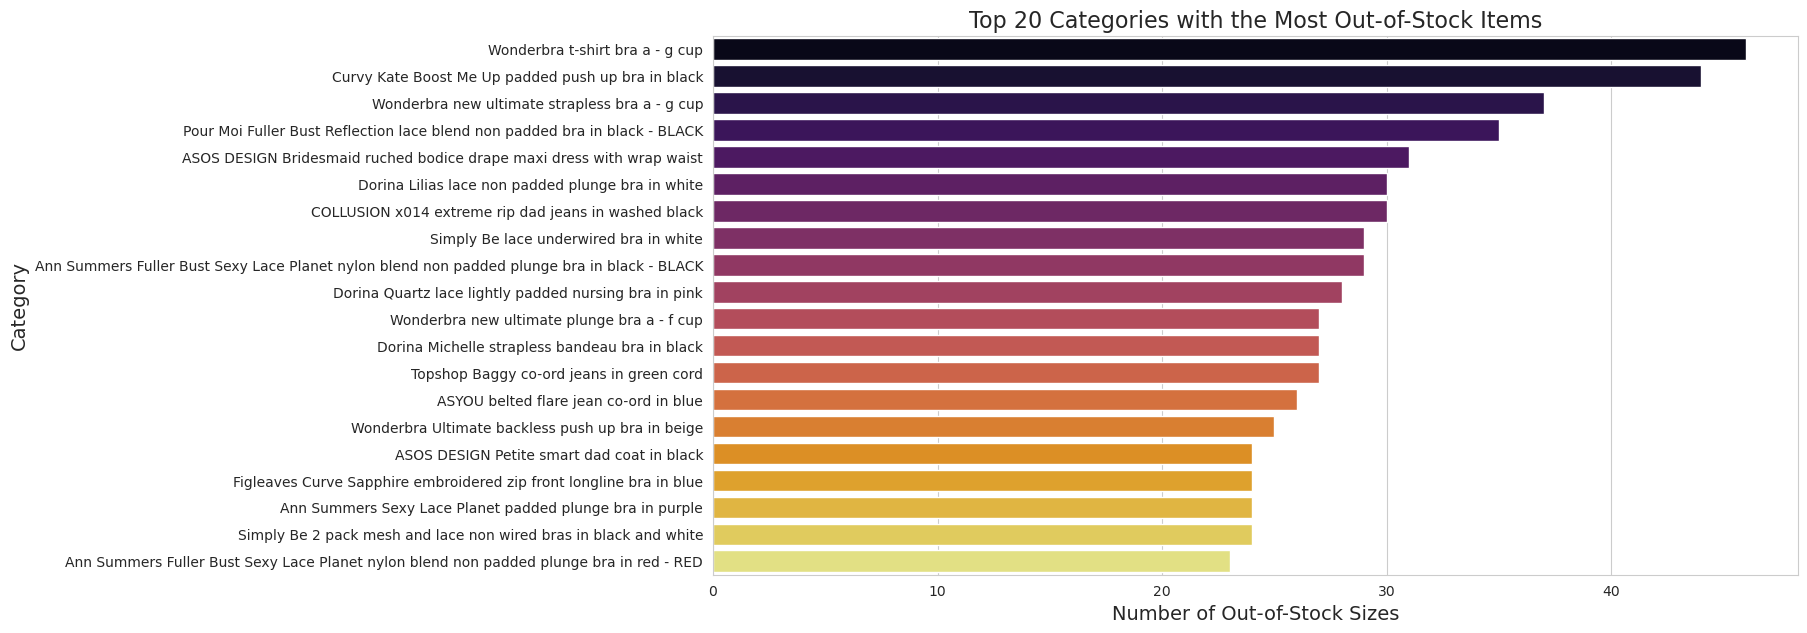

In [17]:
# Inventory Insights: Determine which categories have the most out-of-stock items

# Calculate number of out-of-stock items per category
out_of_stock_by_category = df_asos_cleaned[df_asos_cleaned['num_out_of_stock'] > 0].groupby('category')['num_out_of_stock'].sum().sort_values(ascending=False).head(20)

# Visualize categories with the most out-of-stock items
plt.figure(figsize=(14, 7))
sns.barplot(y=out_of_stock_by_category.index, x=out_of_stock_by_category.values, palette='inferno')
plt.title('Top 20 Categories with the Most Out-of-Stock Items', fontsize=16)
plt.xlabel('Number of Out-of-Stock Sizes', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.show()
